
# Diseño de software

----

## Clases abstractas y meta programación

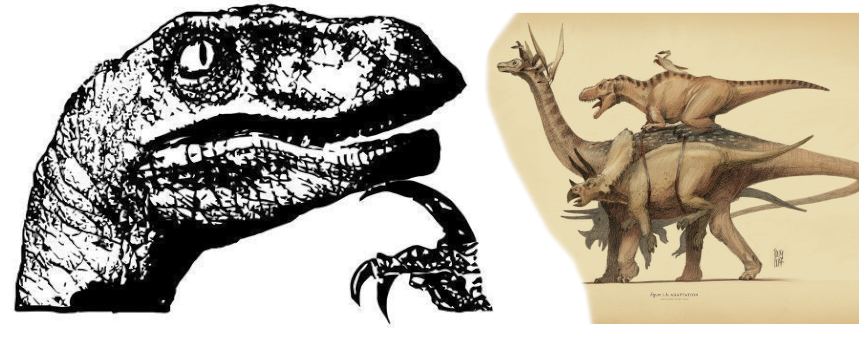


## Metaprogramación

> Metaprogramming is a programming technique in which computer programs have the ability to treat other programs as their data. It means that a program can be designed to read, generate, analyze or transform other programs, and even modify itself while running.

- Algunos lenguajes implementan al propio lenguaje como estrctura de datos (homoiconicidad), otros implementan templates (C, C++) y otros algun tipo de meta-clases (python, smalltalk, lua). 
- Hay mas tipos de implementaciones.

## Metaprogramación - AST

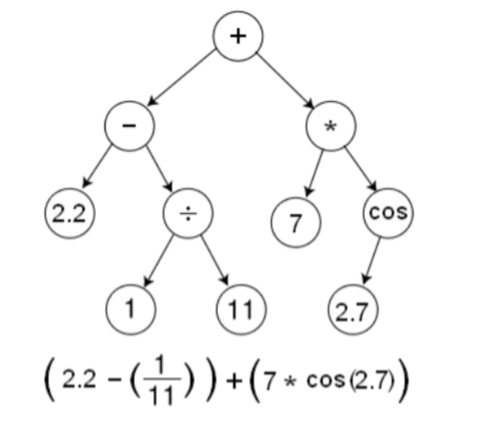

- https://vpyast.appspot.com/
- https://python-ast-explorer.com/
- https://astexplorer.net/
- [ast module](https://docs.python.org/3/library/ast.html)


## Intermedio

> Què es y qué hace `type()`?

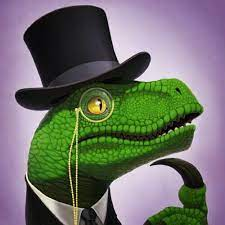

https://docs.python.org/3/library/functions.html#type

## Funciones de meta programación
----

In [9]:
class P:
    var = "algo"

    
p = P()

In [10]:
getattr(p, "var")

'algo'

In [11]:
hasattr(p, "var")

True

In [12]:
delattr(p, "var")  # por que esto no anda?
getattr(p, "var", "Not-found")

AttributeError: var

In [13]:
print("cls", vars(P))
print("instance", vars(p))

cls {'__module__': '__main__', 'var': 'algo', '__dict__': <attribute '__dict__' of 'P' objects>, '__weakref__': <attribute '__weakref__' of 'P' objects>, '__doc__': None}
instance {}


## Creando clases con type
-----

In [14]:
def init(self, b):
    self.b = b

MyClass = type('MyClass',(dict,),{'a':True, "__init__": init})

del init

In [15]:
class MyClass(dict, metaclass=type):
    
    a = True
    def __init__(self, b):
        self.b = b

## Metaclases

En programación orientada a objetos, una metaclase es una clase cuyas instancias son clases. En otras palabras, como los objetos son instancias de una clase, las clases son instancias de una metaclase.

No todos los lenguajes orientados a objetos soportan metaclases. Además, los lenguajes que lo soportan tienen sus propias reglas que definen como los objetos, clases y metaclases interactúan. 



## Metaclases 

> Problema: quiero validar que una clase "modelo" tenga definido un atributo `nombre` que tiene que ser un string, si no ecuentra el valor se lanza un error de atributo, si se encuentra se lo convierte a mayusculas.

## Metaclases

In [ ]:
class Bien:
    nombre = "zaraza"
    
class Mal: # no tiene nombre
    ...
    
class ReMal: # nombre no es str
    nombre = 1

### Esto no es una metaclase - Una funcion que valide

In [ ]:
def validar_y_cambiar(cls):
    members = vars(cls)
    nombre = members.get("nombre", None)
    if nombre is None:
        raise AttributeError("nombre no existe")
    if not isinstance(nombre, str):
        raise TypeError("nombre no es str")
    cls.nombre = nombre.upper()

In [ ]:
validar_y_cambiar(Bien)
Bien.nombre

In [ ]:
validar_y_cambiar(Mal)

In [ ]:
validar_y_cambiar(ReMal)

### Metaclases - Aproach como decorador

La idea es no tener las cosas dando vuelta por separado

In [16]:
def validar_y_cambiar(cls):  # esto es un decorador por el return
    members = dict(vars(cls))
    nombre = members.get("nombre", None)
    if nombre is None:
        raise AttributeError("nombre no existe")
    if not isinstance(nombre, str):
        raise TypeError("nombre no es str")
    
    members["nombre"] = nombre.upper()
    
    cls_name = cls.__name__
    cls_bases = cls.__mro__
    
    
    return type(cls_name, cls_bases, members)

### Metaclases - Aproach como decorador

La idea es no tener las cosas dando vuelta por separado

In [ ]:
@validar_y_cambiar
class Bien:
    nombre = "zaraza"

In [ ]:
@validar_y_cambiar
class Mal: # no tiene nombre
    ...


In [ ]:
@validar_y_cambiar
class ReMal: # nombre no es str
    nombre = 1

### Metaclases - Aproach de copiar la interfaz de type

In [ ]:
def validar_y_cambiar(name, bases, members):
    
    nombre = members.get("nombre", None)
    if nombre is None:
        raise AttributeError("nombre no existe")
    if not isinstance(nombre, str):
        raise TypeError("nombre no es str")
    
    members["nombre"] = nombre.upper()
    
    return type(name, bases, members)

### Metaclases - Aproach de copiar la interfaz de type

In [ ]:
class Bien(metaclass=validar_y_cambiar):
    nombre = "zaraza"

In [ ]:
class Mal(metaclass=validar_y_cambiar): # no tiene nombre
    ...

In [ ]:
class ReMal(metaclass=validar_y_cambiar): # nombre no es str
    nombre = 1

### Metaclases - Herencia!

si queremos hacer una jerarquia de clases y recien definir lo requerido al final, este aproach falla

In [ ]:
# esto no anda si queremos hacer herencia de Validar y Cambiar
class ValidarYCambiar(metaclass=validar_y_cambiar): 
    pass

class AlgoAsi(ValidarYCambiar):
    nombre = "tito"

### Metaclases - Herencia!

si queremos hacer una jerarquia de clases y recien definir lo requerido al final, este aproach falla

In [ ]:
def validar_y_cambiar(name, bases, members):
    print("validando!")
    
    if not members.get("abstract"):
        nombre = members.get("nombre", None)
        if nombre is None:
            raise AttributeError("nombre no existe")
        if not isinstance(nombre, str):
            raise TypeError("nombre no es str")

        members["nombre"] = nombre.upper()
        members["metaclass"] = validar_y_cambiar
    
    return type(name, bases, members)

In [ ]:
class ValidarYCambiar(metaclass=validar_y_cambiar): 
    abstract = 1

### Metaclases - Herencia!

si queremos hacer una jerarquia de clases y recien definir lo requerido al final, este aproach falla

In [ ]:
class Bien(ValidarYCambiar):
    nombre = "zaraza"

class Mal(ValidarYCambiar): 
    ...
    
class ReMal(ValidarYCambiar): # no tiene nombre
    nombre = 1

## Meta clases - `__init_subclass__`

Este método se llama siempre que la clase contenedora se hereda. cls es entonces la nueva subclase. Si se define como un método de instancia normal, este método se convierte implícitamente en un método de clase (osea se le pone de prepo el `@classmethod`).

In [ ]:
class ValidarYCambiar:
    
    def __init_subclass__(cls, **kwargs):
        super().__init_subclass__(**kwargs)
        
        print("validando!")
        members = vars(cls)
        nombre = members.get("nombre", None)
    
        if not members.get("abstract"):
            if nombre is None:
                raise AttributeError("nombre no existe")
            if not isinstance(nombre, str):
                raise TypeError("nombre no es str")

        cls.nombre = nombre.upper()
    
    
class Bien(ValidarYCambiar):
    nombre = "zaraza"

class Mal(ValidarYCambiar): 
    ...
    
class ReMal(ValidarYCambiar): # no tiene nombre
    nombre = 1

## Menos didáctico

Que hace esto?

In [ ]:
class DataClass:
    
    def __init_subclass__(cls, **kwargs):
        super().__init_subclass__(**kwargs)
        members = dict(vars(cls))
        cls._init_params = {}
        for k, v in members.items():
            if not k.startswith("__"):
                delattr(cls, k)
                cls._init_params[k] = v 
    
    def __init__(self, **kwargs):
        for k, v in kwargs.items():
            if k not in self._init_params:
                raise ValueError(k)
            elif self._init_params[k] != type(v):
                raise TypeError(f"{k} must be instance of {self._init_params[k]}")
            setattr(self, k, v)

In [ ]:
class MyClass(DataClass):
    a = int
    b = str

MyClass(a=1, b=12)

### Clases abstractas

Python y otras librerias bienen con muchas metaclases para usar de mil formas.

Una clase abstracta es aquella de la que no se pueden declarar instancias, dicho de otra manera no se pueden declarar objetos de una clase abstracta. La finalidad de una clase abstracta es servir como clase base para otras clases a las que generalmente se conoce como clases "concretas".

In [17]:
from collections.abc import Mapping

class MyDict(Mapping):
    ...

In [18]:
MyDict()

TypeError: Can't instantiate abstract class MyDict with abstract methods __getitem__, __iter__, __len__

In [19]:
from collections.abc import Mapping

class MyDict(Mapping):
    def __init__(self, **kwargs):
        self.d = kwargs
        
    def __getitem__(self, k):
        return self.d[k]
    
    def __iter__(self):
        return iter(self.d)
    
    def __len__(self):
        return len(self.d)
    
    def __getattr__(self, a):
        return self[a]

d = MyDict(a= 42)
d.a

42

### Clases abstractas

In [20]:
import abc

class ClaseBase(metaclass=abc.ABCMeta):
    
    @abc.abstractmethod
    def m(self):
        raise NotImplementedError()       


In [21]:
ClaseBase()

TypeError: Can't instantiate abstract class ClaseBase with abstract method m

In [22]:
class Clase(ClaseBase):
    def m(self):
        super().m()
        return 42

Clase().m()

NotImplementedError: 